# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [1]:
import pandas as pd
# Импортируем функцию делить выборку на валидационнную и тренировочную
from sklearn.model_selection import train_test_split
# Импортируем структуру решающего дерева
from sklearn.tree import DecisionTreeClassifier
# Импортируем структуру Случайного леса
from sklearn.ensemble import RandomForestClassifier
# Импортируем структуру логистической регрессии
from sklearn.linear_model import LogisticRegression
# Импротируем метрику Accuracy
from sklearn.metrics import accuracy_score
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [2]:
# Отображение всех столбцов
pd.set_option('display.max_columns', None)
# Два знака после запятой 
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
pth1 = 'datasets/users_behavior.csv'
pth2 = '/datasets/users_behavior.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# Проверим на несбалансиорванность целевого признака
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [6]:
# Посмотрим во сколько раз число пользователей тарифом Самрт больше числа пользователей тарифа Ультра  в датасете
len(data.query('is_ultra == 0')) / len(data.query('is_ultra == 1'))

2.2629441624365483

## Разбейте данные на выборки

In [7]:
# поместим признаки в переменную features 
features = data.drop(['is_ultra'], axis=1)
# поместим целевой признак в переменную target
target = data['is_ultra']
#Разделим выборку на тренировочную и валидационную, котору потом разделим на валидационную и тестовую
features_train, features_valid_all, target_train, target_valid_all = train_test_split(features, target, test_size=0.4, random_state=12345)
# валидационную выборку делим пополам: на валидационную и тетовую
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_all, target_valid_all, test_size=0.5, random_state=12345)

print('Обучающая выборка:', features_train.shape, 'в процентах:', round(len(features_train)/len(data)*100, 2),'%')
print('Валидационная выборка:', features_valid.shape, 'в процентах:', round(len(features_valid)/len(data)*100, 2),'%')
print('Тестовая выборка:', features_test.shape, 'в процентах:', round(len(features_test)/len(data)*100, 2),'%')

Обучающая выборка: (1928, 4) в процентах: 59.99 %
Валидационная выборка: (643, 4) в процентах: 20.01 %
Тестовая выборка: (643, 4) в процентах: 20.01 %


### Вывод
- Данные были разделены: отдельно данные с признаками, отдельно целевой признак
- Были сделаны три выборки: тренировочная, валидационная и тестовая в пропорции 60:20:20

In [8]:
# # Посмотрим во сколько раз число пользователей тарифом Самрт больше числа пользователей тарифа Ультра  в датасе
(target==0).sum()/(target==1).sum()


2.2629441624365483

In [9]:
# В валидационной выборке в целевом признаке пользователей смартом также больше пользователей Ультры
(target_valid_all==0).sum()/(target_valid_all==1).sum()

2.2806122448979593

In [10]:
# поместим признаки в переменную features 
features = data.drop(['is_ultra'], axis=1)
# поместим целевой признак в переменную target
target = data['is_ultra']
#Разделим выборку на тренировочную и валидационную, котору потом разделим на валидационную и тестовую
features_train, features_valid_all, target_train, target_valid_all = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
# валидационную выборку делим пополам: на валидационную и тетовую
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_all, target_valid_all, test_size=0.5, random_state=12345,stratify=target_valid_all)

print('Обучающая выборка:', features_train.shape, 'в процентах:', round((features_train.shape[0])/len(data)*100, 2),'%')
print('Валидационная выборка:', features_valid.shape, 'в процентах:', round((features_valid.shape[0])/len(data)*100, 2),'%')
print('Тестовая выборка:', features_test.shape, 'в процентах:', round((features_test.shape[0])/len(data)*100, 2),'%')

Обучающая выборка: (1928, 4) в процентах: 59.99 %
Валидационная выборка: (643, 4) в процентах: 20.01 %
Тестовая выборка: (643, 4) в процентах: 20.01 %


In [11]:
# # Посмотрим во сколько раз число пользователей тарифом Самрт больше числа пользователей тарифа Ультра  в датасе
(target==0).sum()/(target==1).sum()


2.2629441624365483

In [12]:
# В валидационной выборке в целевом признаке пользователей смартом также больше пользователей Ультры
(target_valid_all==0).sum()/(target_valid_all==1).sum()

2.263959390862944

## Исследуйте модели

In [13]:
# Решающее дерево
# Подберем параметр глубины через цилк
#добавим график, для графика нужен датафрейм, где индекс - глубина, и столбец accuracy
# список глубин решающего дерева
depth_tree = []
#список accuracy решающего дерева на валидационной выборке
accuracy_tree_valid = []
#список accuracy решающего дерева на тренировочной выборке
accuracy_tree_train = []
best_result_tree = 0
best_depth_tree = 0
best_model_tree = None
for depth in tqdm(range(1,16)):
#поместим в можел структуру решающего дерева
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
# обучим модель
    model_tree.fit(features_train, target_train)
# предскажем целевой признак на валидационной выборке
    prediction_valid_tree = model_tree.predict(features_valid)
    result = accuracy_score(target_valid, prediction_valid_tree)
# глубину в список
    depth_tree.append(depth)
# accuracy в  список
    accuracy_tree_valid.append(result)
# добавим accuracy тренировочной выборки в список
    accuracy_tree_train.append(accuracy_score(target_train, model_tree.predict(features_train)))
    if result > best_result_tree:
        best_model_tree = model_tree
        best_depth_tree = depth
        best_result_tree = result
print('Доля правильных ответов Accuracy на валидационной выборке у Решающего дерева:', round(best_result_tree, 2), 'Глубина:', best_depth_tree)  

100%|██████████| 15/15 [00:00<00:00, 100.82it/s]

Доля правильных ответов Accuracy на валидационной выборке у Решающего дерева: 0.8 Глубина: 8


In [14]:
accuracy_tree_train = pd.Series(accuracy_tree_train, index=depth_tree)
accuracy_tree_train

1    0.75
2    0.78
3    0.79
4    0.80
5    0.81
6    0.83
7    0.84
8    0.86
9    0.87
10   0.89
11   0.90
12   0.92
13   0.93
14   0.94
15   0.96
dtype: float64

In [15]:
# Для отрисовки графика сделаем датасет
tree_graphic = pd.DataFrame(data = accuracy_tree_valid, columns = ['accuracy_tree_valid'], index = depth_tree)
tree_graphic['accuracy_tree_train'] = accuracy_tree_train
tree_graphic

,accuracy_tree_valid,accuracy_tree_train
1,0.74,0.75
2,0.77,0.78
3,0.78,0.79
4,0.75,0.80
5,0.79,0.81
6,0.77,0.83
7,0.79,0.84
8,0.80,0.86
9,0.78,0.87
10,0.77,0.89


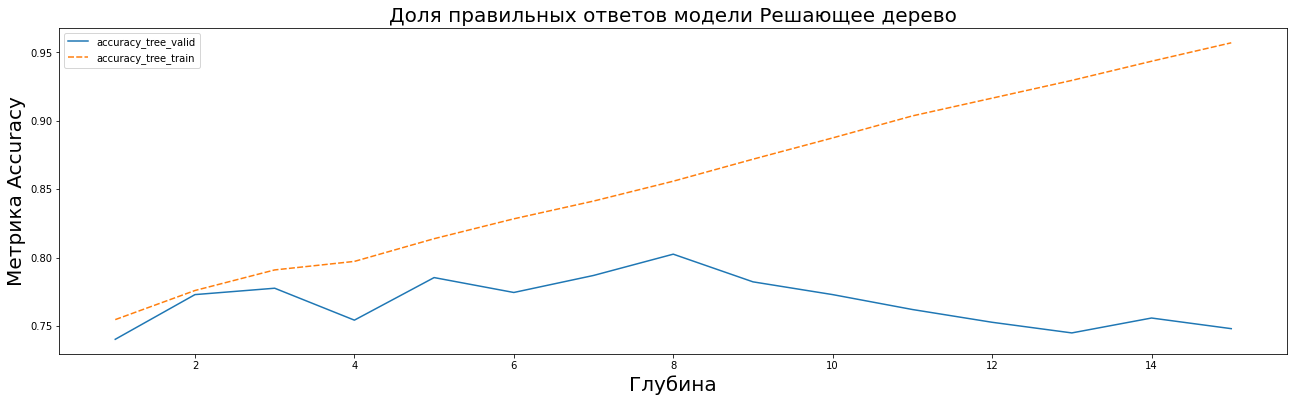

In [16]:
# График Accuracy
plt.figure(figsize=(22,6))

sns.lineplot(data=tree_graphic)
plt.title("Доля правильных ответов модели Решающее дерево", fontsize=20)
plt.xlabel("Глубина", fontsize=20)
plt.ylabel("Метрика Accuracy", fontsize=20)
#plt.legend('')
plt.show()

#**Закомментировано** новый код ниже

# Случайный лес
# Надо перебрать по количеству деревьев и по глубине , то есть цикл в цикле

best_model_forest = None
best_depth_forest = 0
best_est = 0
best_result_forest = 0
best_leaf = 0
best_split = 0
# перебор по количеству деревьев в лесу от 10 до 51 
for min_leaf in tqdm(range(1, 101, 10)):
    for min_split in range(2, 101, 10):
        for est in range(10, 51, 10):
            #перебор по глубине
            for depth_forest in range(1, 11):
                model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth_forest, min_samples_leaf=min_leaf, min_samples_split=min_split, n_jobs=-1)
                model_forest.fit(features_train, target_train)
                predictions_forest = model_forest.predict(features_valid)
                result_forest = accuracy_score(target_valid, predictions_forest)
                if result_forest > best_result_forest:
                    best_model_forest = model_forest
                    best_depth_forest = depth_forest
                    best_est = est
                    best_result_forest = result_forest
                    best_leaf = min_leaf
                    best_split = min_split

print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est, 'узлов:', best_split, 'Листьев:', best_leaf)
            

In [17]:
%%time
# Случайный лес
# Надо перебрать по количеству деревьев и по глубине , то есть цикл в цикле
# делаем словаь с параметрами для леса

parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,11),
              'min_samples_leaf': range (1, 101, 10),
              'min_samples_split': range (2, 101, 10)}
#              'random_state': list('12345'),
#              'n_jobs': -1}
#структура леса в переменной
model_forest = RandomForestClassifier(random_state=12345, n_jobs=-1)
#cv=5 - что это...
model_forest_grid = GridSearchCV(model_forest, parametrs, cv=5)
#В случаи использования GridSearch, не нужно будет заранее делать валидационную выборку
# Пробуем
#  Исправляю, объединю тренировочную выборку с валидационной для GridSearch
#best_model_forest = model_forest_grid.fit(features_train, target_train)

best_model_forest = model_forest_grid.fit(features_train.append(features_valid, ignore_index=True), target_train.append(target_valid, ignore_index=True))

predictions_forest = model_forest_grid.predict(features_valid)
result_forest = accuracy_score(target_valid, predictions_forest)

#print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), '\nГлубина:',best_depth_forest, '\nДеревьев:', best_est, '\nузлов:', best_split, '\nЛистьев:', best_leaf)

CPU times: user 29min 14s, sys: 14.5 s, total: 29min 28s
Wall time: 29min 30s


In [19]:
# Accuracy Случайного леса на валидационной выборке
#print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(result_forest, 2), '\nГлубина:',model_forest_grid.best_estimator_.max_depth, '\nДеревьев:', model_forest_grid.best_estimator_.n_estimators, '\nузлов:', model_forest_grid.best_estimator_.min_samples_split, '\nЛистьев:', model_forest_grid.best_estimator_.min_samples_leaf)

In [20]:
print("Доля правильных ответов Accuracy у Случайного леса, тренировочная выборка:", round(model_forest_grid.best_score_, 2), '\nГлубина:',model_forest_grid.best_estimator_.max_depth, '\nДеревьев:', model_forest_grid.best_estimator_.n_estimators, '\nузлов:', model_forest_grid.best_estimator_.min_samples_split, '\nЛистьев:', model_forest_grid.best_estimator_.min_samples_leaf)

Доля правильных ответов Accuracy у Случайного леса, тренировочная выборка: 0.81 
Глубина: 8 
Деревьев: 10 
узлов: 22 
Листьев: 1


In [21]:
# Логистическая регрессия
#Задали структуру в переменную
model_log_reg = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
# обучили модель
model_log_reg.fit(features_train, target_train)
best_model_linear = model_log_reg
predictions_log_reg = model_log_reg.predict(features_valid)
result_log_reg = accuracy_score(target_valid, predictions_log_reg)
print("Доля правильных ответов Accuracy на валидационной выборке у Логистической регрессии:", round(result_log_reg, 2))

Доля правильных ответов Accuracy на валидационной выборке у Логистической регрессии: 0.74


###  Вывод

- Были обучены 3 модели по алгоритмам: Решающее дерево, Случайный лес, Логистическая регрессия
- Получены метрики качества Accuracy (доля правильных ответов)
- Луше всего по метрике Accuracy показал результат Случайный лес с параметрами: количество деревьев 40, глубина 8
- Два алгоритма показали метрику качества лучше, чем целевая в 0.75: 
* Решающее дерево, Accuracy: 0.79, глубина 3
* Случайный лес , Accuracy: 0,81, количество деревьев 40, глубина 8, листев 1, узлов 2
* Логистическая регрессия, Accuracy: 0.71

Лучший результат на валидационой выборке у Случайного леса - 0.81

## Проверьте модель на тестовой выборке

In [22]:
# дерево решений тестовая выборка
#prediction_test_tree = best_model_tree.predict(features_test)
#resuls_test_tree = accuracy_score(prediction_test_tree, target_test)
#Случайный лес тестовая выборка
predictions_test_forest = best_model_forest.predict(features_test)
result_test_forest = accuracy_score(predictions_test_forest, target_test)
#логистическая регрессия тестовая выборка
#presdictions_test_linear = model_log_reg.predict(features_test)
#result_test_linear = accuracy_score(target_test, presdictions_test_linear)

In [23]:
#print('Accuracy на тестовой выборке, алгоритм Рещающее дерево', round(resuls_test_tree, 2))
print('Accuracy на тестовой выборке, алгоритм Случайный лес', round(result_test_forest, 2))
#print('Accuracy на тестовой выборке, алгоритм Логистическая регрессия', round(result_test_linear, 2))


Accuracy на тестовой выборке, алгоритм Случайный лес 0.83


In [24]:
model_forest_grid.best_estimator_.n_estimators

10

### Вывод
Лучший результат на тестовой выборке по метрике "Доля верных решений Accuracy" показал алгоритм Случайный лес. Доля верных решений составила 0.81


## (бонус) Проверьте модели на адекватность

 Проверим модели на адекватность/вменяемость

В задачах классификации, как в нашем случае, модель сравнивают со случайной величиной

Если доля правильных ответов, полученных случайно, больше доли правильных ответов, выданных обученной моделью, значит модель не годится

~~В задании мы имеем два варианта ответа - это либо 0, либо 1. То есть, либо тариф Смарт, либо Ультра будет выбран пользователем. Шансы угадать случайно один из ответов 50/50. Можно сказать accuracy=0.5~~

~~Применяя алгоритмы машинного обучения имеем Accuracy по всем трем алгоритмам больше 0.5, значит модели работают лучше, чем простое угадывание~~

In [25]:
## Проверим на несбалансиорванность целевого признака
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

In [26]:
# Accuracy - это ведь отношение правильных ответов к общему количеству
# Поэтому можно посмотртеь долю пользователей тарифом Смарт:
print('Доля пользователей тарифом Смарт в датасете :', round(len(data.query('is_ultra == 0')) / len(data), 2))
print('Доля пользователей тарифом Смарт в датасете :', round(len(data.query('is_ultra == 1')) / len(data), 2))

Доля пользователей тарифом Смарт в датасете : 0.69
Доля пользователей тарифом Смарт в датасете : 0.31


# расчет
у нас два значения 1 и 0 в целевом признаке. Вероятность угадать 1 такая же как и для нуля, то есть 0.5

accuracy при случайном угадывании = 0.5 * 0.69 + 0.5 * 0.31 = 0.345+0.155= 0.5

А наши модели дают accuracy, начиная с 0.74
Заничит все наши модели адекватны)

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [х] Весь код исполняется без ошибок
- [х] Ячейки с кодом расположены в порядке исполнения
- [х] Выполнено задание 1: данные загружены и изучены
- [х] Выполнено задание 2: данные разбиты на три выборки
- [х] Выполнено задание 3: проведено исследование моделей
    - [х] Рассмотрено больше одной модели
    - [х] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [х] Написаны выводы по результатам исследования
- [х] Выполнено задание 3: Проведено тестирование
- [х] Удалось достичь accuracy не меньше 0.75
